#### **Multiple linear regression on Auto dataset**

In [2]:
library(ISLR)

In [3]:
attach(Auto)

In [3]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

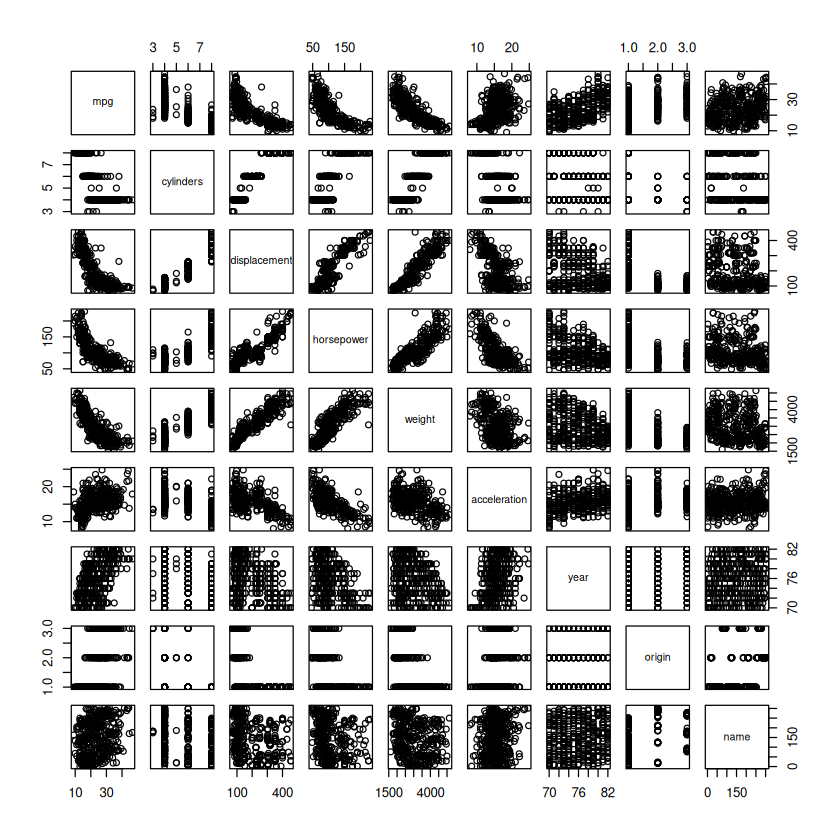

In [4]:
plot(Auto)

In [8]:
cor(subset(Auto, select=-name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In [10]:
lm.fit = lm(mpg ~ . - name, data=Auto)

In [12]:
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [13]:
"
1. Yesm there is a significant relationship between predictors and response as F is 252 >>> 1,
    and p value is ~ 0
2. (Displacement, weight, year, origin) have a statistically significant response
3. The newer the car, the more efficient it is
"

[1] "\n1. Yesm there is a significant relationship between predictors and response as F is 252 >>> 1,\n    and p value is ~ 0\n2. (Displacement, weight, year, origin) have a statistically significant response\n3. The newer the car, the more efficient it is\n"

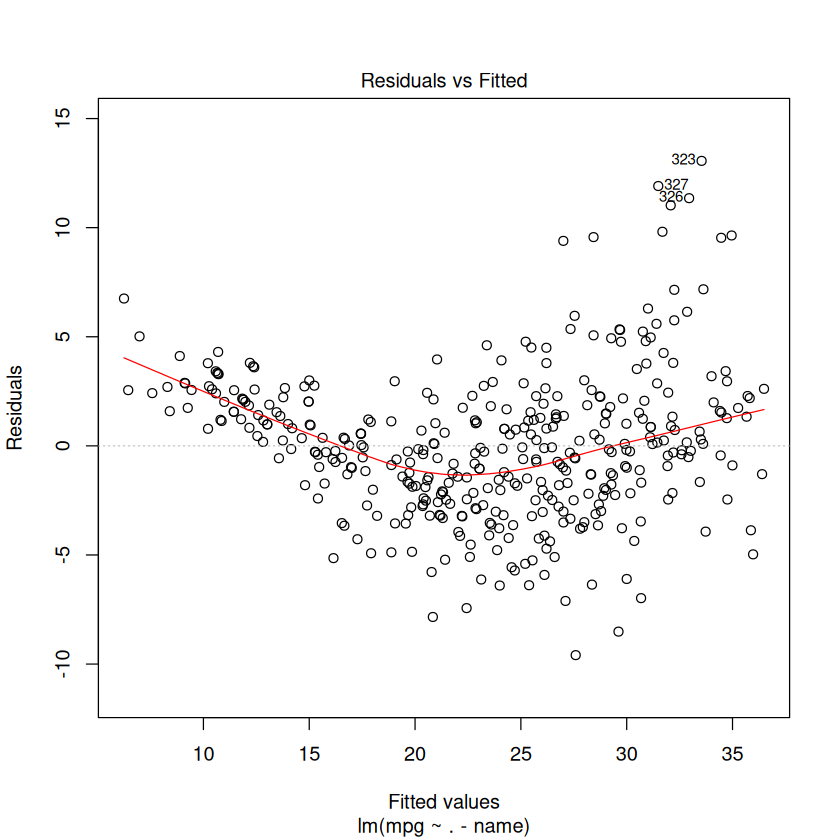

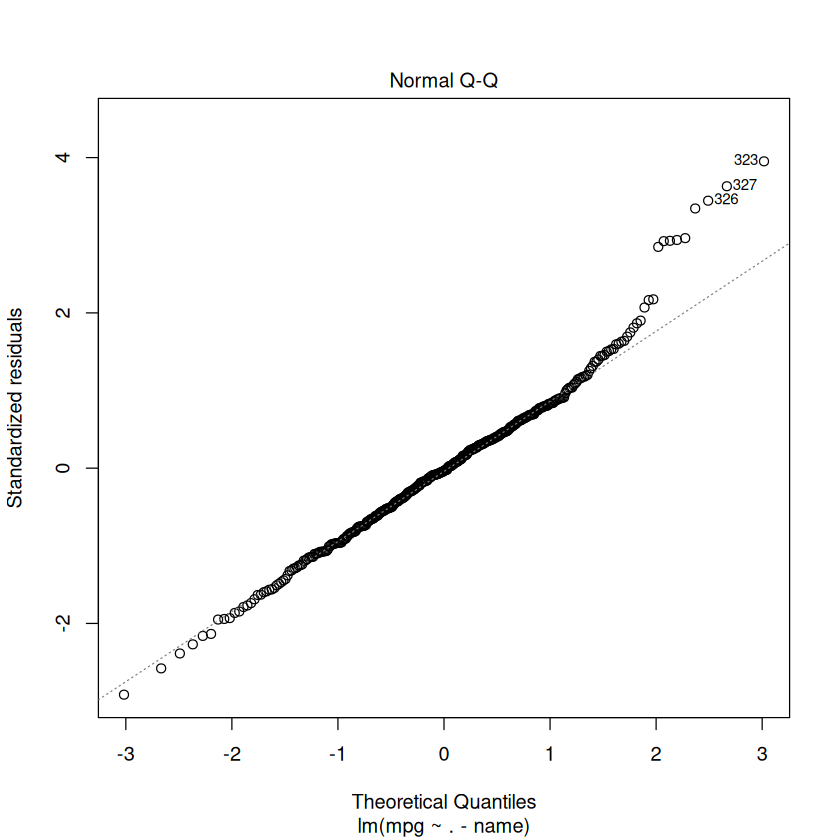

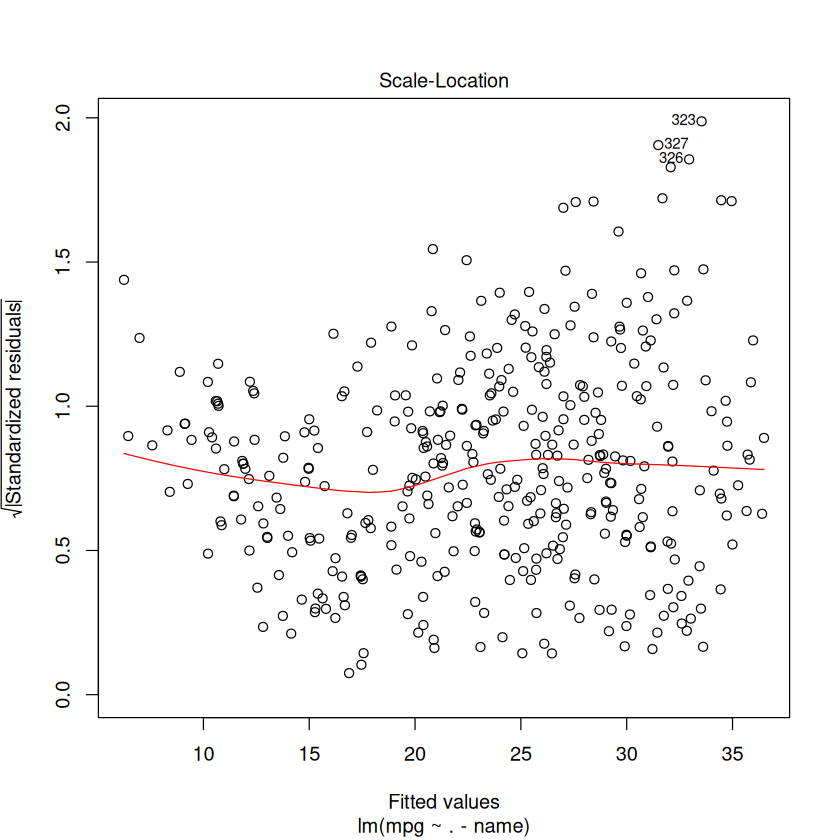

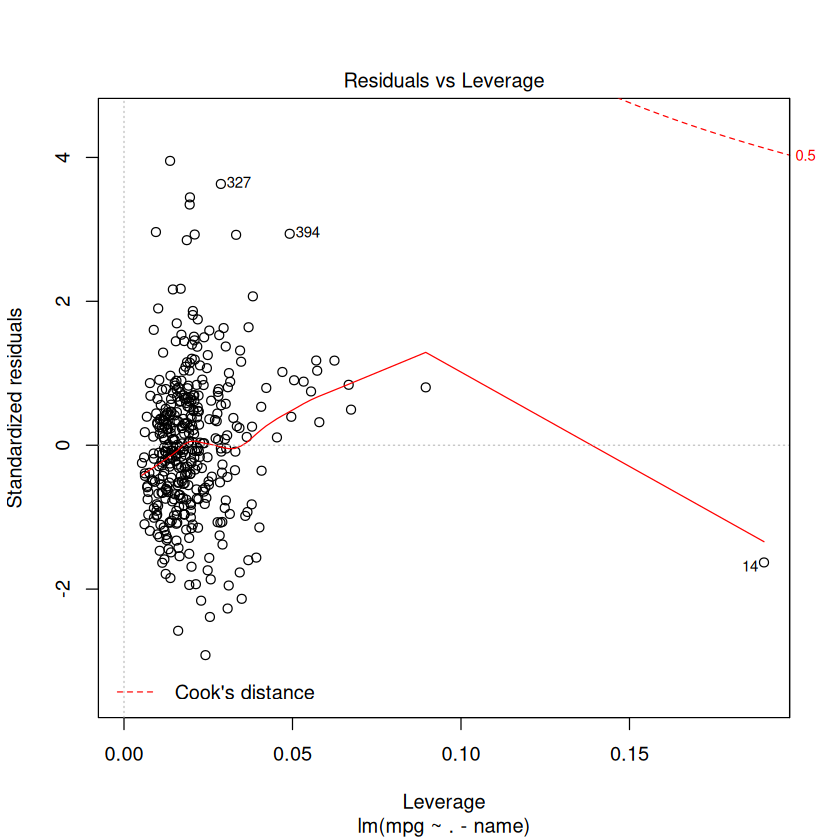

In [15]:
plot(lm.fit)

In [16]:
# There is one point in the last plot that has a lof of leverage

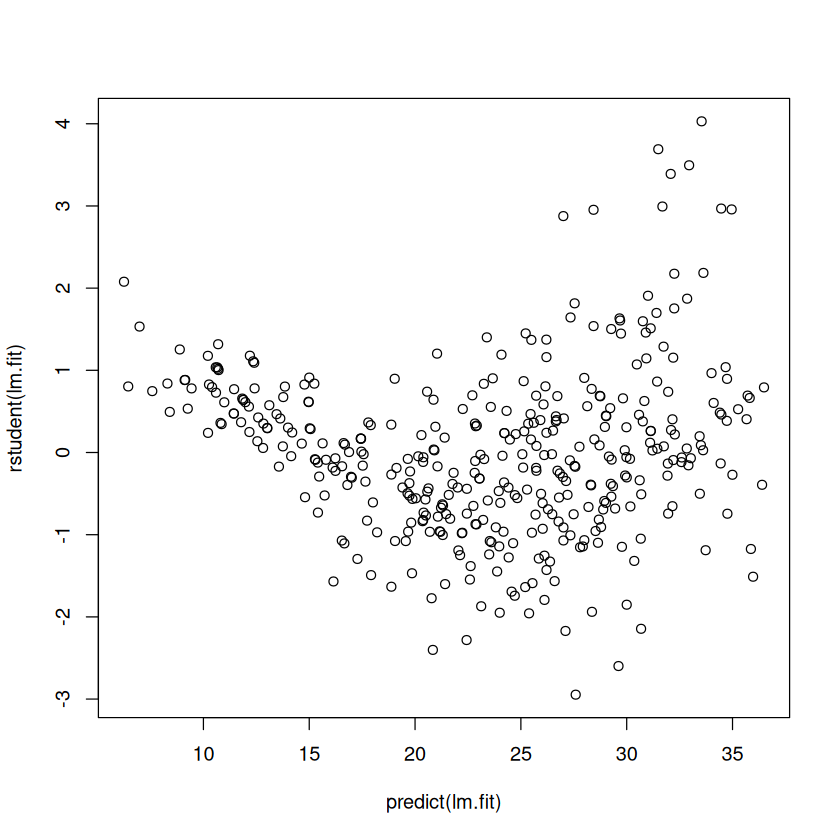

In [17]:
plot(predict(lm.fit), rstudent(lm.fit))

In [18]:
# There are a few outliers and one leverage point

In [24]:
lm.fit2 = lm(mpg ~ cylinders*displacement + displacement*weight + year*origin, data=Auto)

In [25]:
summary(lm.fit2)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight + year * origin, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2498 -1.6461 -0.0974  1.3592 13.2489 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.663e+01  8.213e+00   2.025 0.043598 *  
cylinders               4.994e-01  5.606e-01   0.891 0.373563    
displacement           -7.343e-02  1.366e-02  -5.377 1.32e-07 ***
weight                 -1.092e-02  9.761e-04 -11.190  < 2e-16 ***
year                    4.931e-01  1.022e-01   4.826 2.02e-06 ***
origin                 -1.468e+01  4.264e+00  -3.444 0.000637 ***
cylinders:displacement -1.705e-03  2.543e-03  -0.671 0.502819    
displacement:weight     2.322e-05  3.653e-06   6.355 5.91e-10 ***
year:origin             1.937e-01  5.472e-02   3.540 0.000449 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.974 on 383 degrees of free

In [26]:
# There is a small but significant interaction between displacement and weight
# Same case with year and origin

In [27]:
lm.fit3 = lm(mpg ~ log(displacement))

In [28]:
summary(lm.fit3)


Call:
lm(formula = mpg ~ log(displacement))

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1204  -2.5843  -0.4217   2.1979  19.9005 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        85.6906     2.1422   40.00   <2e-16 ***
log(displacement) -12.1385     0.4155  -29.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 390 degrees of freedom
Multiple R-squared:  0.6863,	Adjusted R-squared:  0.6855 
F-statistic: 853.4 on 1 and 390 DF,  p-value: < 2.2e-16


In [1]:
# Huge corellation between mpg and log of displacement

In [8]:
lm.fit4 = lm(I(mpg^2)~displacement)

In [9]:
summary(lm.fit4)


Call:
lm(formula = I(mpg^2) ~ displacement)

Residuals:
    Min      1Q  Median      3Q     Max 
-634.18 -165.55  -40.07  112.38 1258.10 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1153.8090    29.0858   39.67   <2e-16 ***
displacement   -2.7948     0.1318  -21.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 272.7 on 390 degrees of freedom
Multiple R-squared:  0.5356,	Adjusted R-squared:  0.5344 
F-statistic: 449.8 on 1 and 390 DF,  p-value: < 2.2e-16
